In [1]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':10}) # set global font size
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe"
from plotly.subplots import make_subplots

# Линейно-взвешенные комбинации

In [2]:
# Скаляры
l1 = 1
l2 = 2
l3 = -3

# Векторы
v1 = np.array([4, 5, 1])
v2 = np.array([-4, 0, -4])
v3 = np.array([1, 3, 2])

# Линейная взвешенная комбинация
l1*v1 + l2*v2 + l3*v3

array([ -7,  -4, -13])

# Базисные векторы и точки

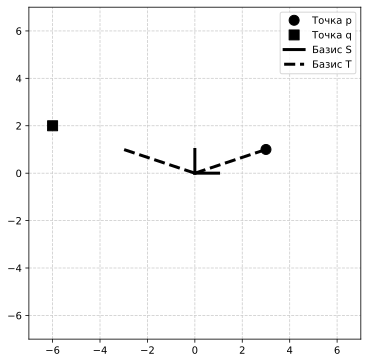

In [3]:
# точки (в декартовых координатах)
p = (3, 1)
q = (-6, 2)

plt.figure(figsize=(6, 6))

# Добавим точки на расинук
plt.plot(p[0], p[1], "ko", markerfacecolor="k", markersize=10, label="Точка p")
plt.plot(q[0], q[1], "ks", markerfacecolor="k", markersize=10, label="Точка q")

# Добавим базисные вектора
plt.plot([0, 1],[0, 0], color="k", linewidth=3, label="Базис S")
plt.plot([0, 0], [0, 1], color="k", linewidth=3)

plt.plot([0, 3], [0, 1], "--", color="k", linewidth=3, label="Базис T")
plt.plot([0, -3], [0, 1], "--", color="k", linewidth=3)

plt.axis("square")
plt.grid(linestyle="--", color=[.8, .8, .8])
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.legend()
plt.show()

# Упражнения по программированию

### Упражнение 1. Реализовать линейную комбинацию через цикл for

In [4]:
# Создадим списки со скалярами и векторами, используя раннее определенные значения
scalars = [l1, l2, l3]
vectors = [v1, v2, v3]

# Зададим "форму" из нулей для вектора линейной комбинации
linCombo = np.zeros(len(v1))

# Спомощью цикла вычислим линейную комбинацию, используя функцию zip()
for vec, scal in zip(vectors, scalars):
    linCombo += scal * vec
    
# Убедимся, что ответ такой же, как выше
print(linCombo)

[ -7.  -4. -13.]


### Упражнение 2. Аналогично первому упражнению, но векторы имеют бОльшые размерности.

In [5]:
# сначала посмотрим на использование zip()
scalars_2 = [1, 4, 5, 7, 3]
vectors_2 = [v1, v2, v3, v2, v3]
linCombo_2 = np.zeros(len(v1))
for vec, scal in zip(vectors_2, scalars_2):
    linCombo_2 += scal * vec
print(linCombo)

# Если скалярова больше, чем векторов функция zip()
scalars_3 = [1, 4, 5, 7, 3, 4, 10, 100]
vectors_2 = [v1, v2, v3, v2, v3]
linCombo_3 = np.zeros(len(v1))
for vec, scal in zip(vectors_2, scalars_2):
    linCombo_3 += scal * vec
print(linCombo)
# Как мы видим, получили правильный ответ, так как функция zip() склеивает аршументы из списков, пока оба списка не пусты, 
# то есть по списку с минимальной длиной

# Далее используем цикл for в явном виде
linCombo_4 = np.zeros(len(v1))
for i in range(len(scalars_3)):
    linCombo_4 += vectors_3[i] * scalars_3[i]
# получаем ошибку

[ -7.  -4. -13.]
[ -7.  -4. -13.]


NameError: name 'vectors_3' is not defined

### Упражнение 3. Построение линейных комбинаций из одного подпространства

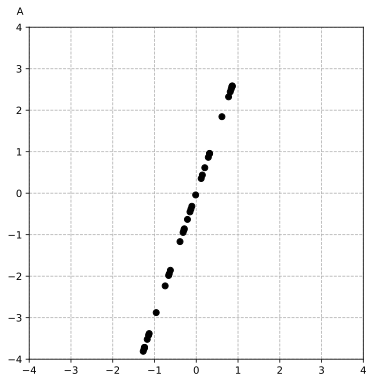

In [8]:
# Зададим начальный вектор
A = np.array([1, 3])

# Диапазон изменения скаляров
xlim = [-4, 4]

# Сгенерируем 100 случайных чисел в нашем диапазоне
scalars = np.random.uniform(low=xlim[0], high=xlim[1], size=100)

# Создадим график
plt.figure(figsize=(6, 6))

# Зададим циклом создание всех точек

for s in scalars:
    
    p = s * A
    plt.plot(p[0], p[1], "ko", markerfacecolor="k")
    
# Как обычно сделаем график красивее
plt.xlim(xlim)
plt.ylim(xlim)
plt.grid(linestyle="--")
plt.text(-4.3, 4.3, "A")
plt.show()

In [9]:
# Повторим процедуру, но для двух векторов в R^3

# сами вектора
u1 = np.array( [3, 5, 1] )
u2 = np.array( [0, 2, 2] )
xlim = [-4, 4] # Напишем заново, чтобы было на виду

# По 100 случайных скаляров на 2 векторов (итого 200 скаляров)
scalars = np.random.uniform(low=xlim[0], high=xlim[1], size=(100, 2))

# Создадим рандомные точки на основе векторов
points = np.zeros((100, 3))
# Далее заполним значения во всех точках линейными комбинациями
for i in range(len(scalars)):
    points[i,:] = scalars[i,0]*u1 + scalars[i,1]* u2

# Изобразим точки на 3d графики с помощью библиотеки plotly
fig = go.Figure( data=[go.Scatter3d(
                        x=points[:,0],
                        y=points[:,1],
                        z=points[:,2],
                        mode="markers",
                        marker=dict(size=6,color='black'))])
fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()

In [10]:
# Аналогично для второго вектора, как v1 * 0.5
# сами вектора
u1 = np.array( [3, 5, 1] )
u2 = u1 / 2
xlim = [-4, 4] # Напишем заново, чтобы было на виду

# По 100 случайных скаляров на 2 векторов (итого 200 скаляров)
scalars = np.random.uniform(low=xlim[0], high=xlim[1], size=(100, 2))

# Создадим рандомные точки на основе векторов
points = np.zeros((100, 3))
# Далее заполним значения во всех точках линейными комбинациями
for i in range(len(scalars)):
    points[i,:] = scalars[i,0]*u1 + scalars[i,1]* u2

# Изобразим точки на 3d графики с помощью библиотеки plotly
fig = go.Figure( data=[go.Scatter3d(
                        x=points[:,0],
                        y=points[:,1],
                        z=points[:,2],
                        mode="markers",
                        marker=dict(size=6,color='black'))])
fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()

In [11]:
# Как мы видим, подпространство размерности 1, так как векторы линейно зависимы, и имеют ранг 1.